**Importing Libraries**

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates(inplace=True)

In [8]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [9]:
X = df.drop('csMPa' , axis=1)
y = df['csMPa']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=23)

In [24]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

y_pred

array([56.85      , 29.66666667, 29.66666667, 29.66666667, 24.674     ,
       39.46070588, 39.46070588, 39.46070588, 53.9834375 , 23.3       ,
       53.9834375 , 38.04147059, 39.46070588, 29.66666667, 30.20692308,
       23.98666667, 23.3       , 42.52138889, 27.83883721, 13.07519608,
       56.85      , 62.9344898 , 42.52138889, 33.67096774, 29.66666667,
       42.52138889, 62.9344898 , 62.9344898 , 13.07519608, 13.07519608,
       39.46070588, 27.83883721, 32.726     , 39.46070588, 39.46070588,
       13.07519608, 64.79166667, 42.52138889, 27.83883721, 56.85      ,
       19.5284375 , 62.9344898 , 27.83883721, 62.9344898 , 13.07519608,
       39.46070588, 33.67096774, 62.9344898 , 38.04147059, 39.536     ,
       30.20692308, 23.3       , 50.5825    , 54.58166667, 42.52138889,
       29.66666667, 42.52138889, 42.52138889, 62.9344898 , 62.9344898 ,
       13.07519608, 39.46070588, 36.36136364, 62.9344898 , 13.90181818,
       29.66666667, 13.07519608, 51.56      , 52.34142857, 29.66

In [25]:
mean_squared_error(y_test , y_pred)

64.76847537318842

In [26]:
np.sqrt(mean_squared_error(y_test , y_pred))

8.047886391667593

In [27]:
r2_score(y_test , y_pred)

0.7821618514565455

In [28]:
from sklearn import tree

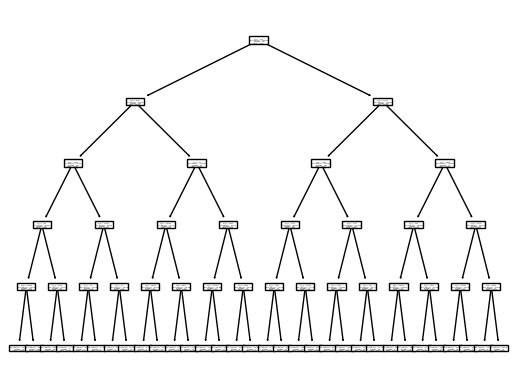

In [29]:
tree.plot_tree(dt)
plt.show()

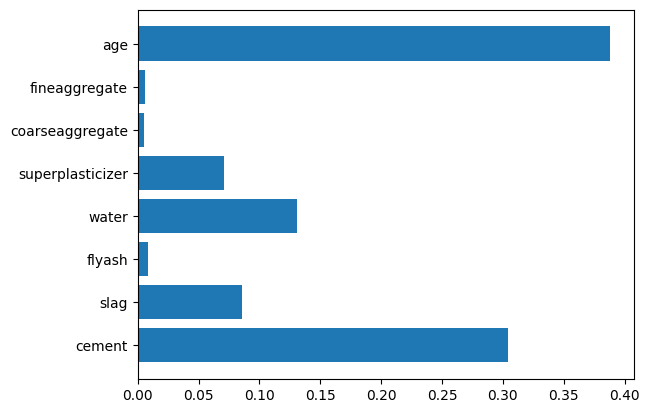

In [30]:
plt.barh(y = dt.feature_names_in_ , width=dt.feature_importances_)
plt.show()